<div align="center">
    <h3 style="color:red">Credit Card Fraud Detection Predictive Models</h3>
</div>


<div style="text-align:center">
    <img src="Credit_card.jpg" alt="Credit Card" />
</div>


<div align="">
    <h3 style="color:blue">Problem statement:</h3>
</div>

###### For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

###### In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.

###### In this project we will detect fraudulent credit card transactions with the help of Machine learning models. We will analyse customer-level data that has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group.

<div align="">
    <h3 style="color:blue">Data understanding:</h3>
</div>

###### The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from 'time' and 'amount', all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

#### load package

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.manifold import TSNE
import umap

#### Read the data

In [2]:
data_df = pd.read_csv("creditcard.csv")

In [3]:
data_df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


#### Check the data

In [4]:
print("Credit Card Fraud Detection data -  rows:",data_df.shape[0]," columns:", data_df.shape)

Credit Card Fraud Detection data -  rows: 284807  columns: (284807, 31)


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

#### Data describes

In [6]:
data_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


#### Check missing values

In [7]:
missing_values = data_df.isnull().sum()
missing_percent = (missing_values / len(data_df)) * 100

missing_data = pd.DataFrame({'Total Missing': missing_values, 'Percentage': missing_percent})
print(missing_data)

        Total Missing  Percentage
Time                0         0.0
V1                  0         0.0
V2                  0         0.0
V3                  0         0.0
V4                  0         0.0
V5                  0         0.0
V6                  0         0.0
V7                  0         0.0
V8                  0         0.0
V9                  0         0.0
V10                 0         0.0
V11                 0         0.0
V12                 0         0.0
V13                 0         0.0
V14                 0         0.0
V15                 0         0.0
V16                 0         0.0
V17                 0         0.0
V18                 0         0.0
V19                 0         0.0
V20                 0         0.0
V21                 0         0.0
V22                 0         0.0
V23                 0         0.0
V24                 0         0.0
V25                 0         0.0
V26                 0         0.0
V27                 0         0.0
V28           

#### There is no missing values

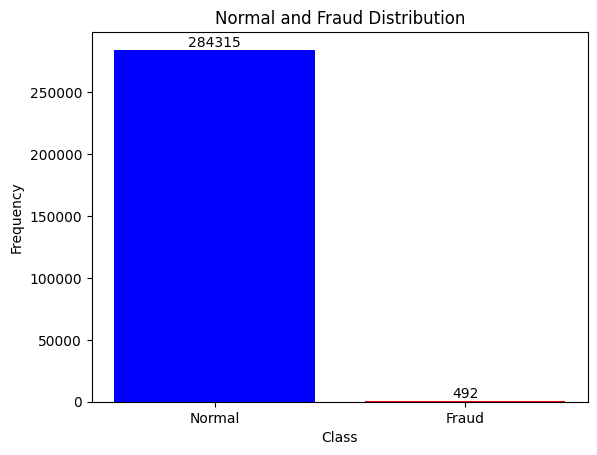

In [8]:

fraud_check = data_df['Class'].value_counts()

plt.bar(fraud_check.index, fraud_check.values, color=['blue', 'red'])

for i, value in enumerate(fraud_check.values):
    plt.text(i, value + 100, str(value), ha='center', va='bottom')

plt.title("Normal and Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.xticks(fraud_check.index, ['Normal', 'Fraud'])

plt.show()

In [9]:
classes = data_df['Class'].value_counts()
normal_shares = classes[0]/data_df['Class'].count()*100
fraud_shares = classes[1]/data_df['Class'].count()*100

print("Not fraud: ", normal_shares)
print("Fraud: ", fraud_shares)

Not fraud:  99.82725143693798
Fraud:  0.1727485630620034


In [10]:
class_distribution = data_df['Class'].value_counts()


print("Class Distribution:")
print(class_distribution)
if len(class_distribution) == 2:
    minority_class_count = min(class_distribution)
    majority_class_count = max(class_distribution)
    class_balance_ratio = majority_class_count / minority_class_count
    if class_balance_ratio < 2:
        print("The classes are balanced.")
    else:
        print("The classes are imbalanced.")
else:
    print("The dataset contains only one class.")

Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64
The classes are imbalanced.


In [11]:
class_0 = data_df[data_df['Class'] == 0]["Time"]
class_1 = data_df[data_df['Class'] == 1]["Time"]


hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [12]:
data_df['Hour'] = data_df['Time'] // 3600

df = data_df.groupby(['Hour', 'Class']).agg(
    Min=('Amount', 'min'),
    Max=('Amount', 'max'),
    Transactions=('Amount', 'count'),
    Sum=('Amount', 'sum'),
    Mean=('Amount', 'mean'),
    Median=('Amount', 'median'),
    Var=('Amount', 'var')
).reset_index()

df.head()


,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


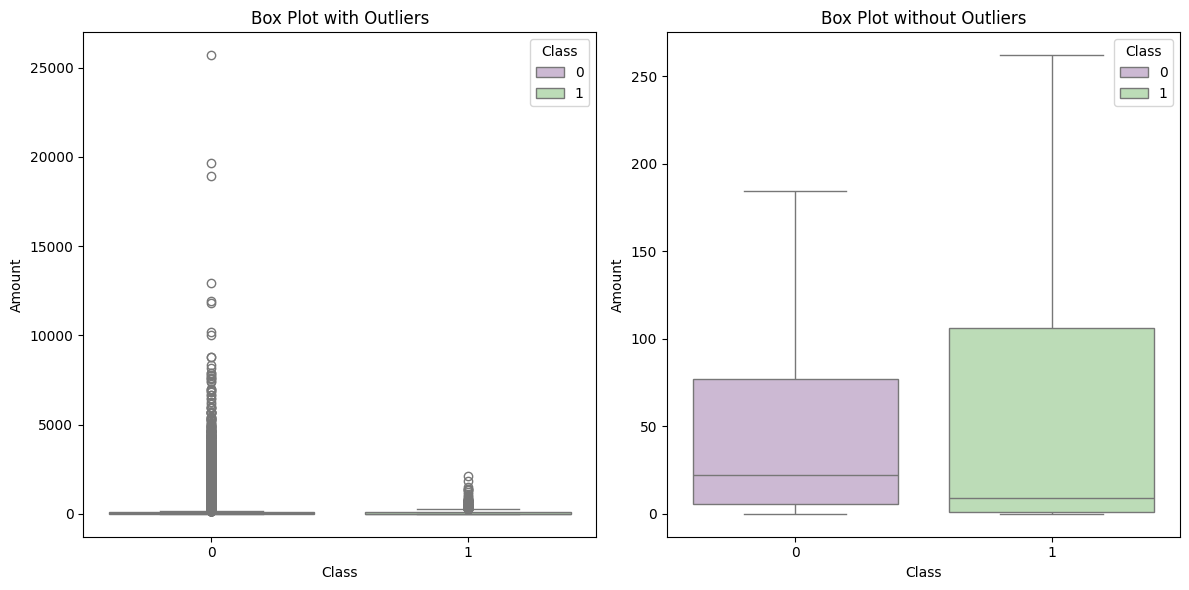

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))


sns.boxplot(ax=ax1, x="Class", y="Amount", hue="Class", data=data_df, palette="PRGn", showfliers=True)
ax1.set_title('Box Plot with Outliers')


sns.boxplot(ax=ax2, x="Class", y="Amount", hue="Class", data=data_df, palette="PRGn", showfliers=False)
ax2.set_title('Box Plot without Outliers')

plt.tight_layout()
plt.show()

In [14]:
summary_stats = data_df.groupby('Class')['Amount'].agg(['count', 'mean', 'median', 'std', 'min', 'max'])
print(summary_stats)

        count        mean  median         std  min       max
Class                                                       
0      284315   88.291022   22.00  250.105092  0.0  25691.16
1         492  122.211321    9.25  256.683288  0.0   2125.87


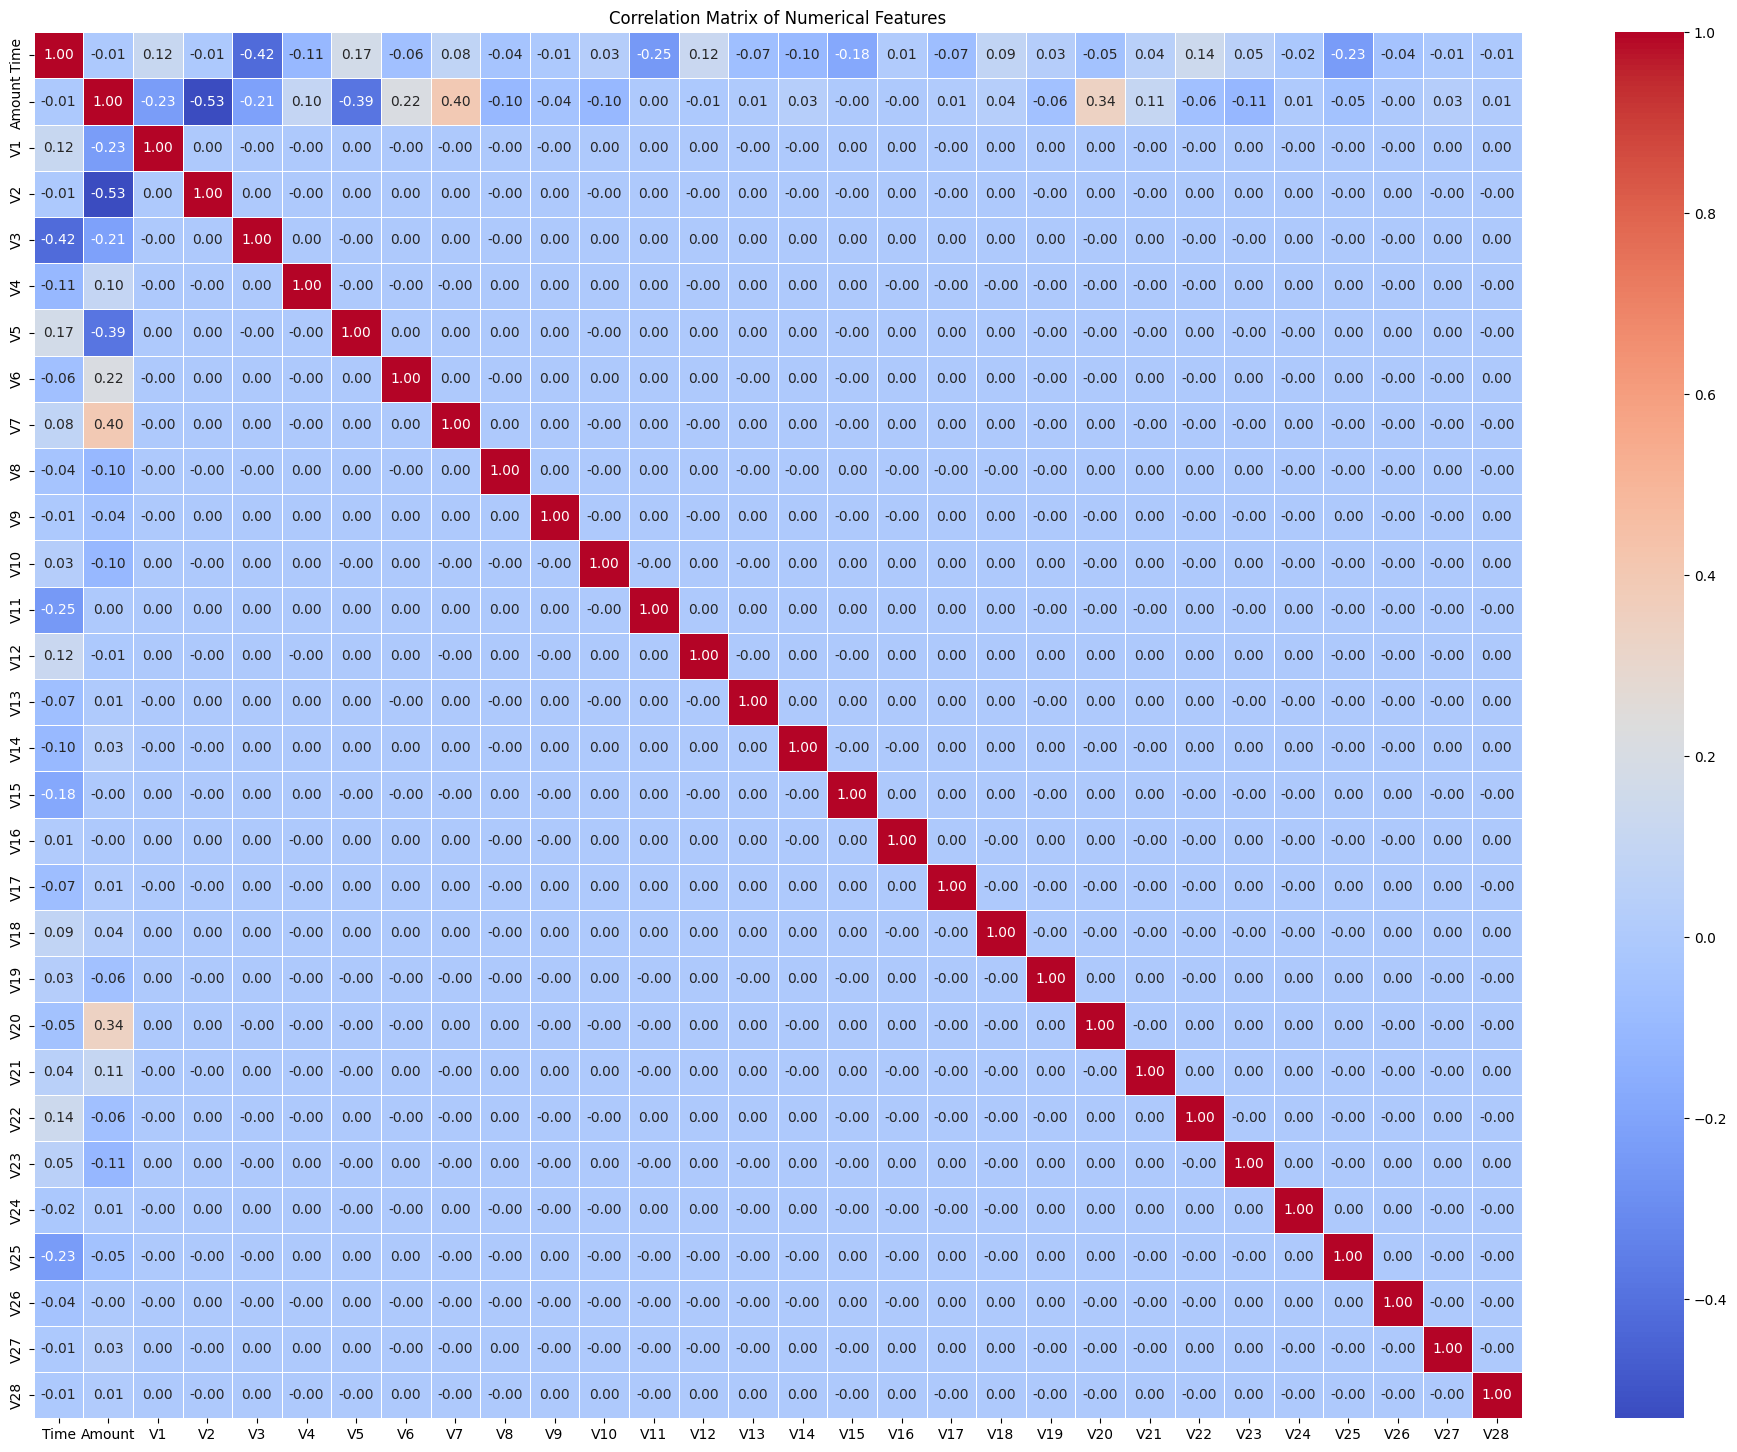

In [19]:
correlation_matrix = data_df[numerical_features].corr()

plt.figure(figsize=(24, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10388\2107068692.py:7: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10388\2107068692.py:7: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10388\2107068692.py:7: UserWarning:



The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10388\2107068692.py:7: UserWarning:



The `bw` parameter is de

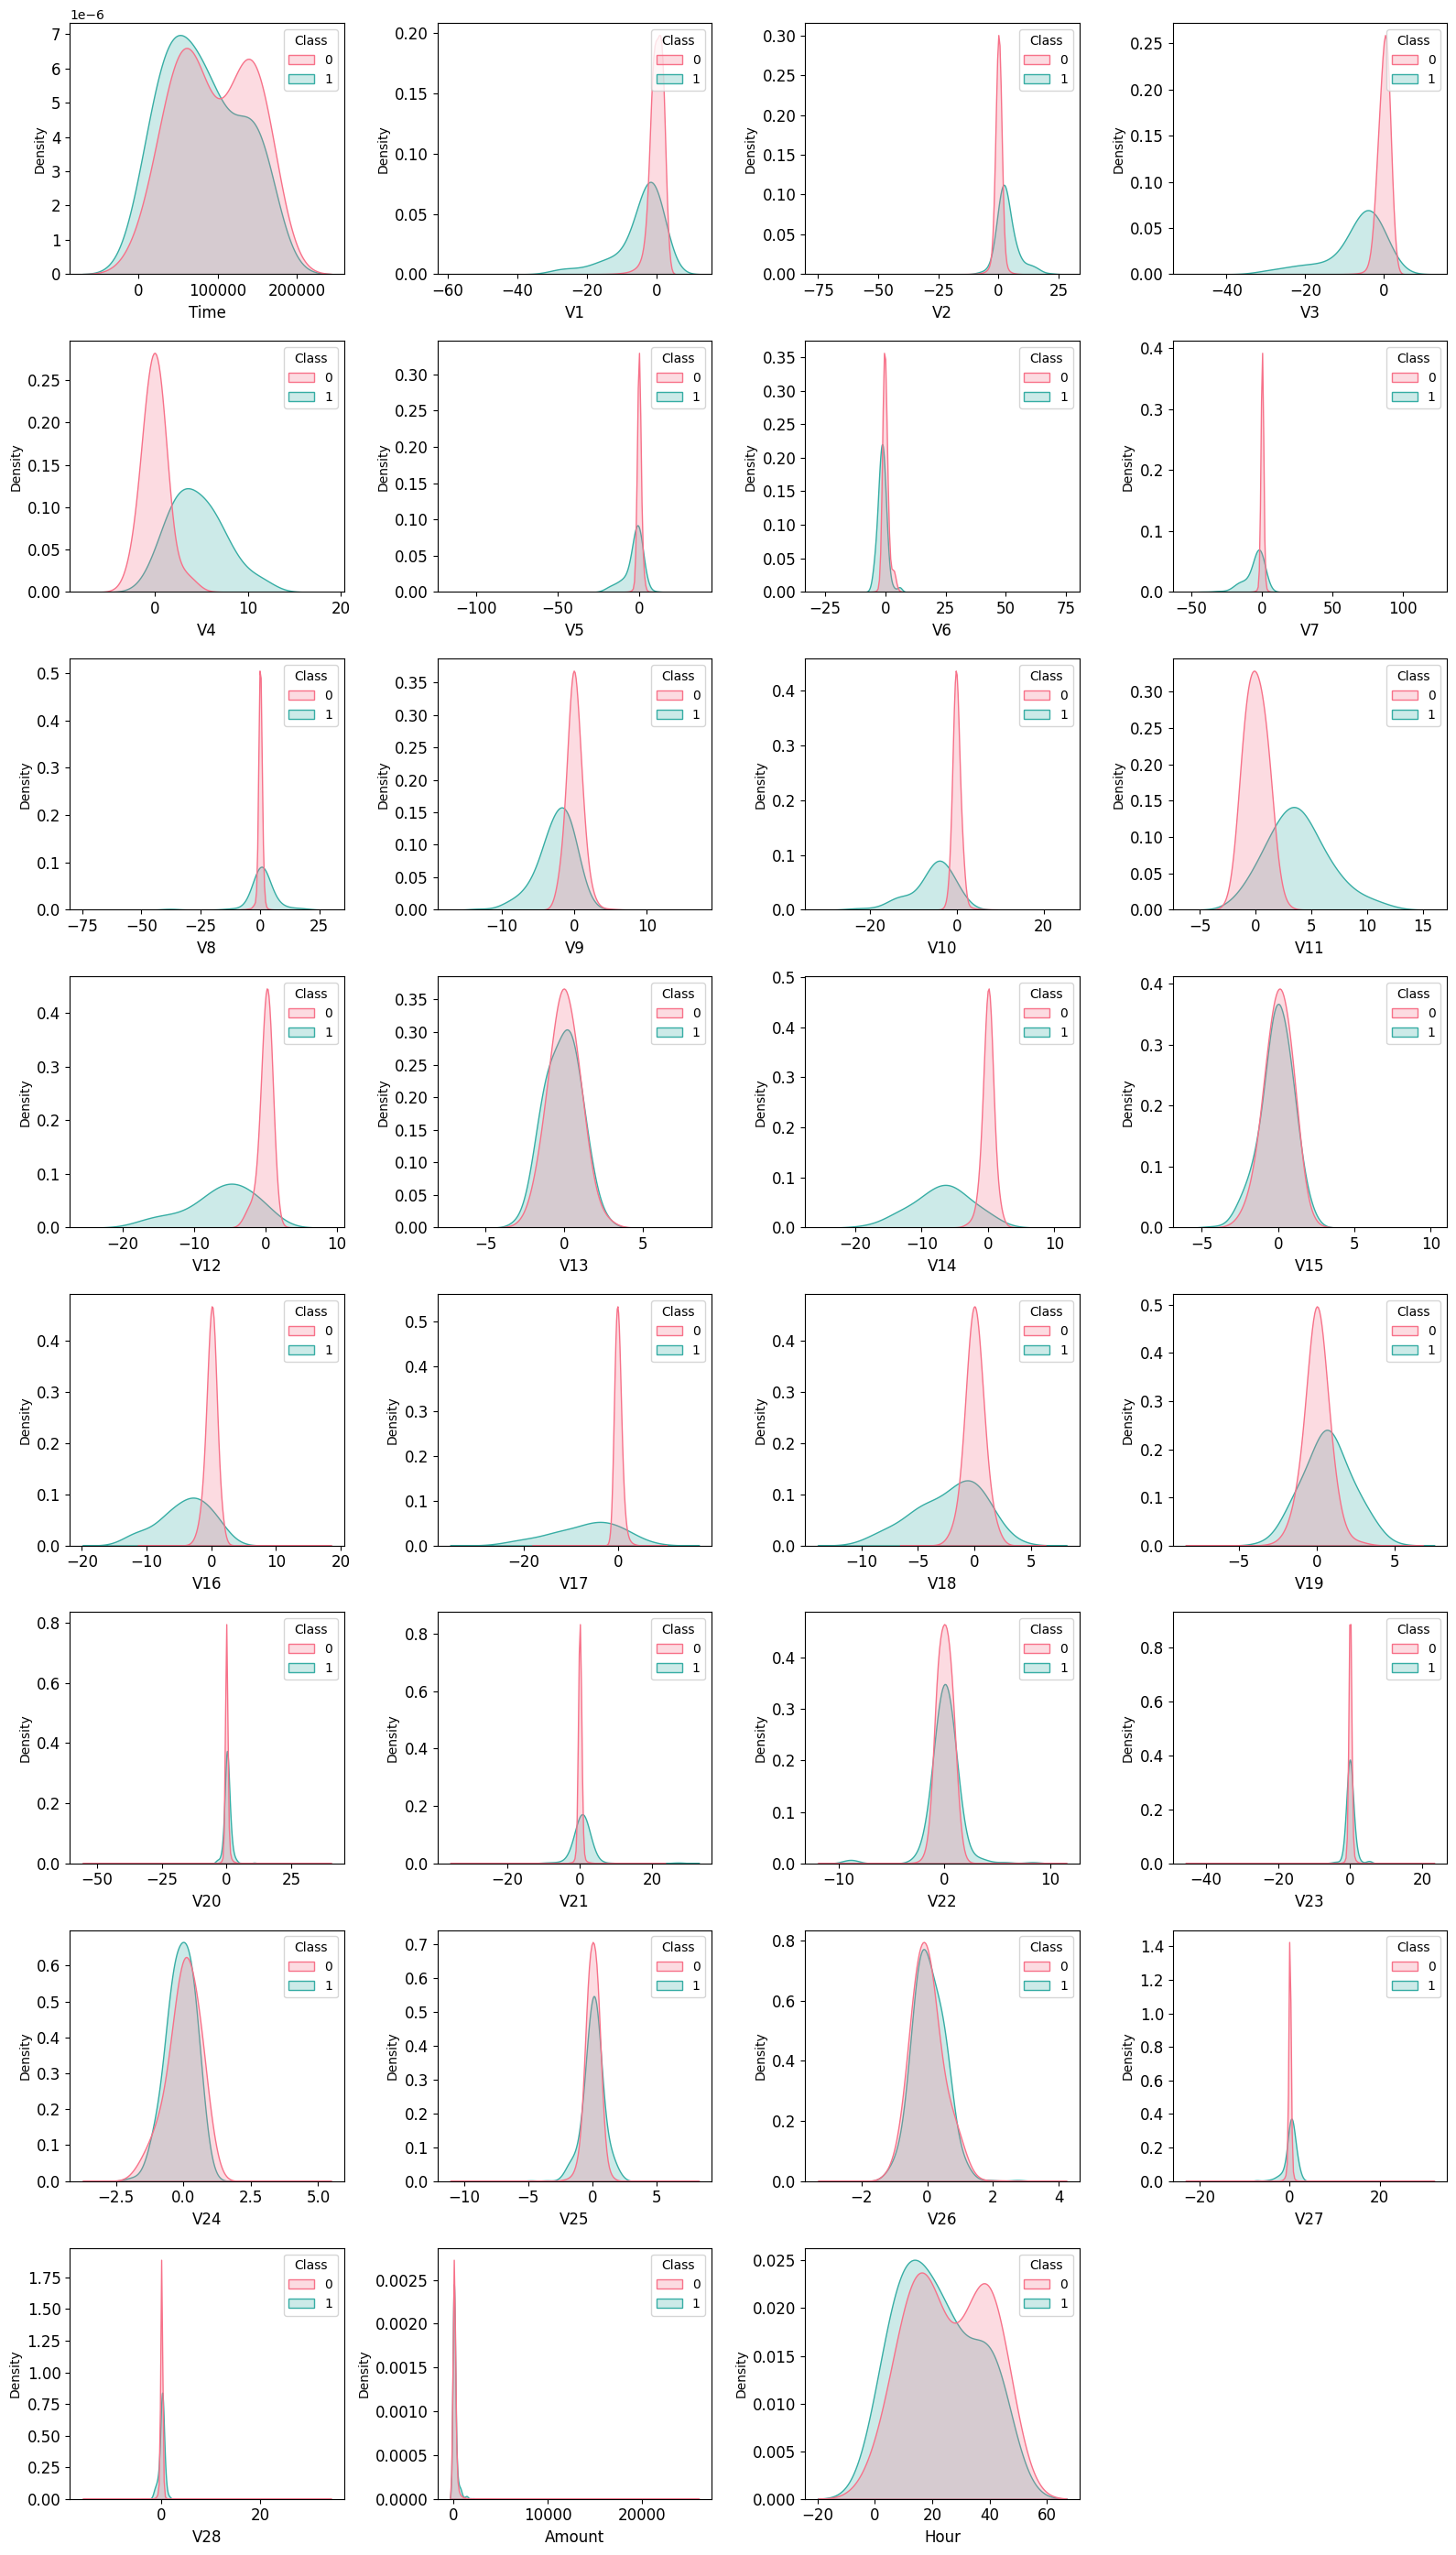

In [18]:
features = data_df.drop('Class', axis=1).columns

# Plot KDE plots for each feature, comparing classes
plt.figure(figsize=(16, 28))
for i, feature in enumerate(features, 1):
    plt.subplot(8, 4, i)
    sns.kdeplot(data=data_df, x=feature, hue='Class', bw=0.5, fill=True, common_norm=False, palette='husl')
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()